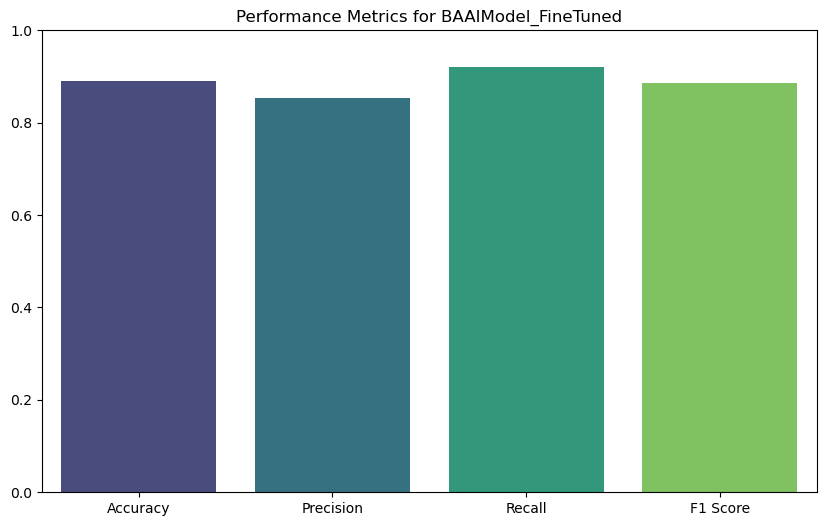

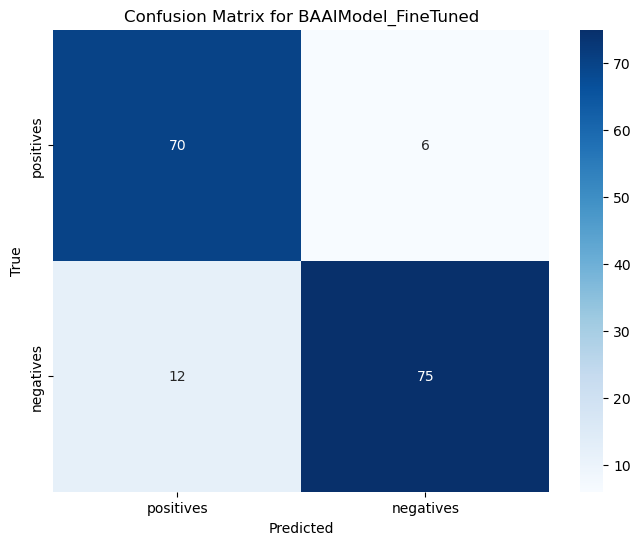

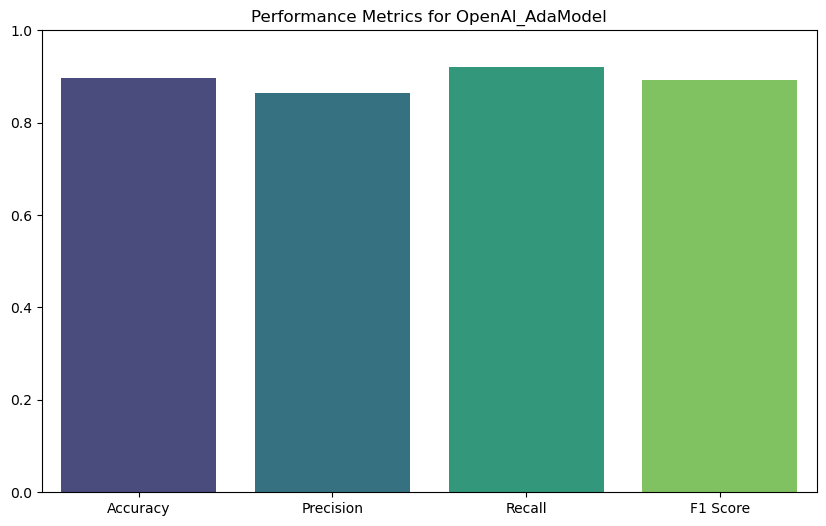

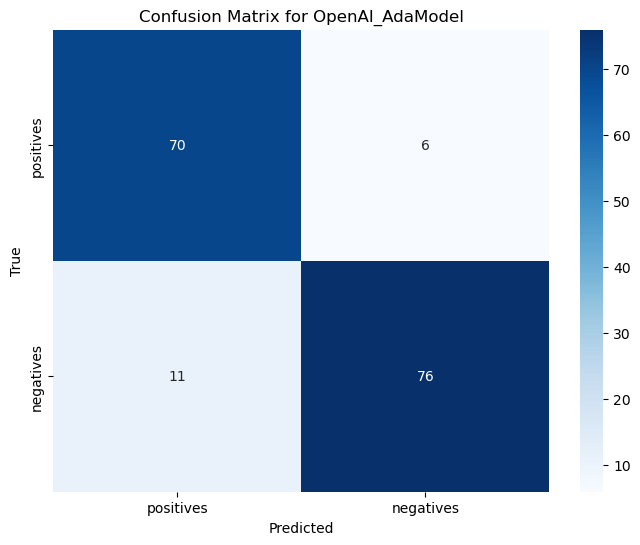

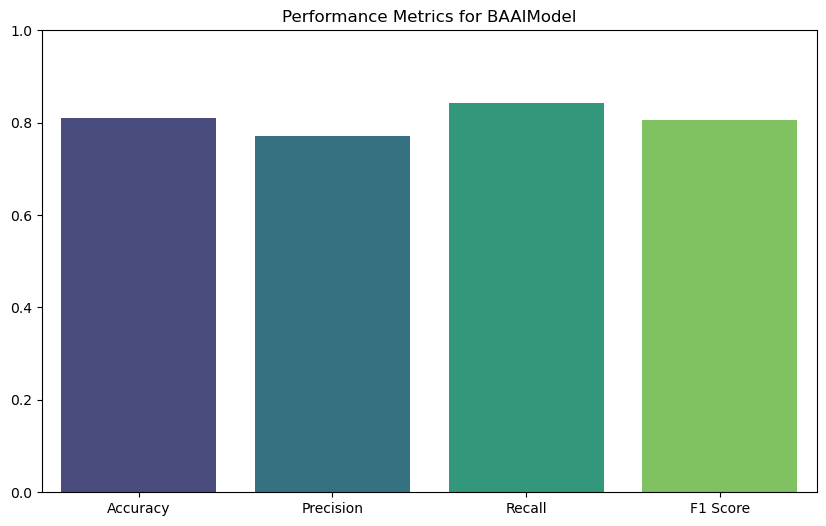

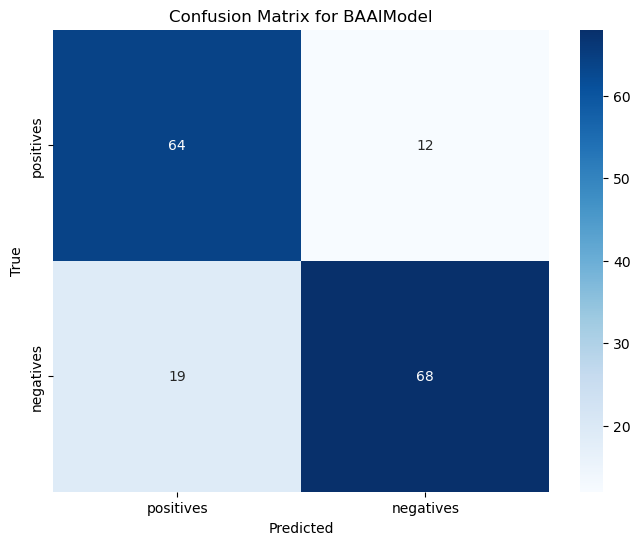

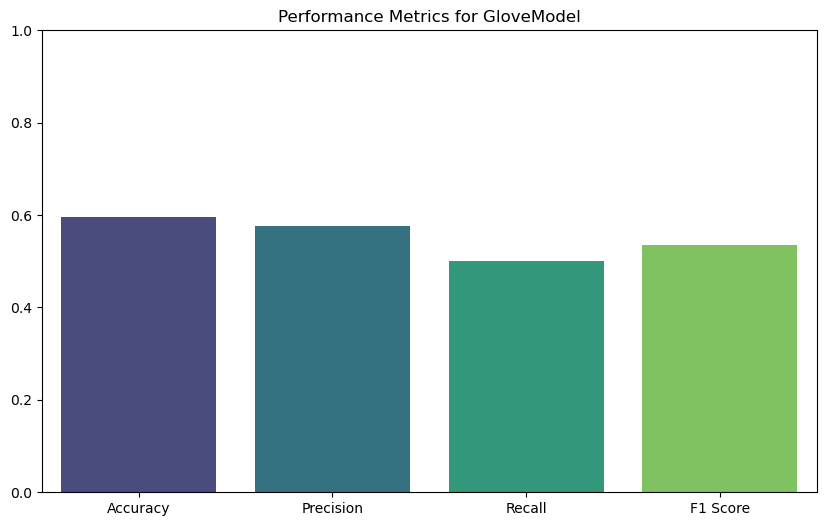

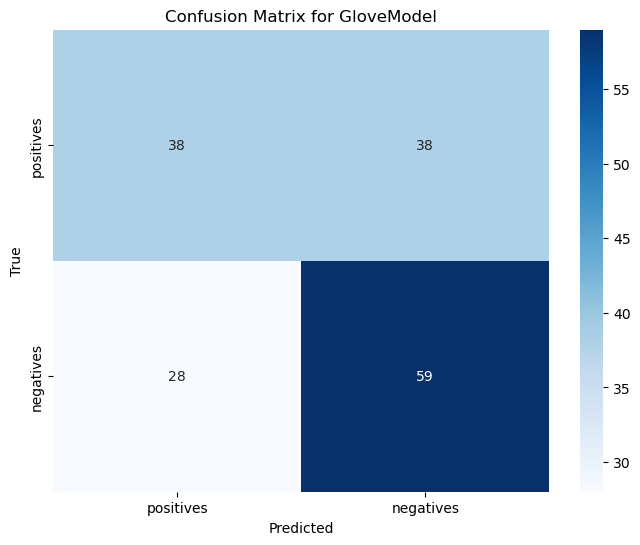

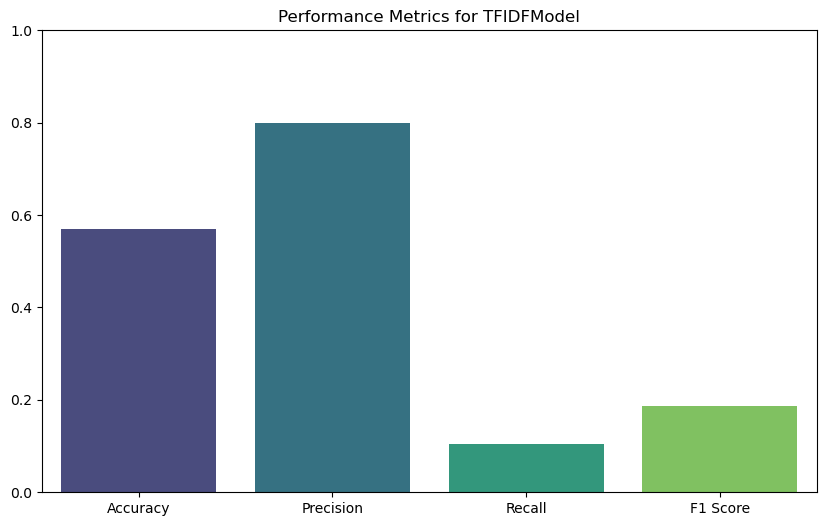

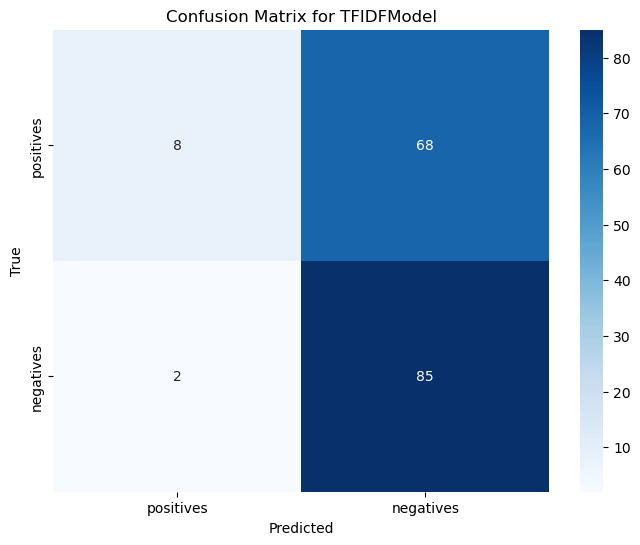

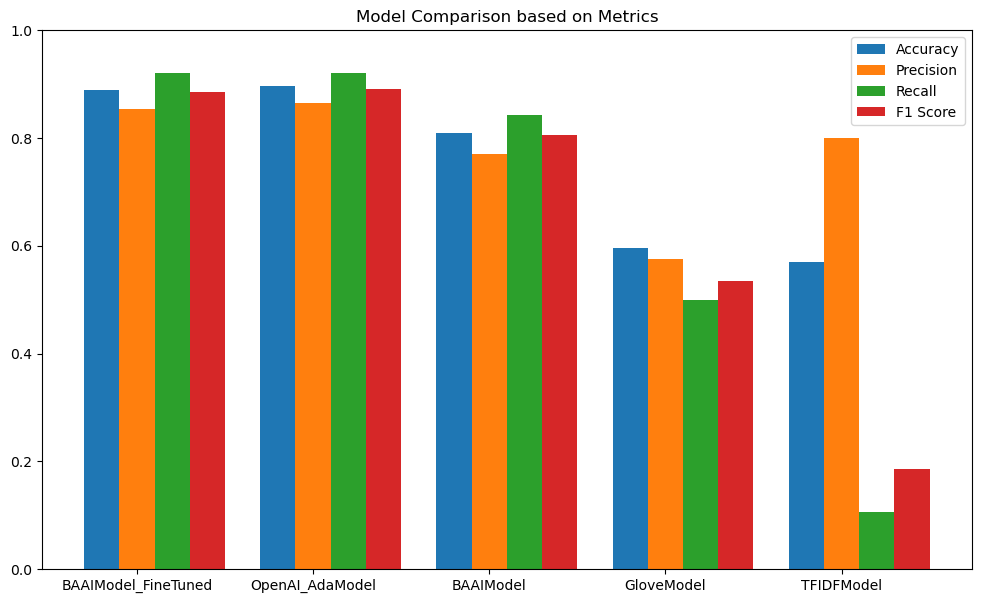

In [1]:
from models import BAAIModel, GloveModel, TFIDFModel, BAAIModel_FineTuned, OpenAI_AdaModel
from utils import read_content_from_directory, extract_categories_from_directory_paths
from charts import compute_metrics, plot_performance_bar, plot_confusion_matrix, plot_all_models_comparison

def process_directories(directory1, directory2):
    category1, category2 = extract_categories_from_directory_paths(directory1, directory2)

    data1 = read_content_from_directory(directory1)
    data2 = read_content_from_directory(directory2)
    
    # Splitting the data into training and test sets (50-50 split)
    half_length1 = len(data1) // 2
    half_length2 = len(data2) // 2

    train_data1, test_data1 = data1[half_length1:], data1[:half_length1]
    train_data2, test_data2 = data2[half_length2:], data2[:half_length2]

    models = [BAAIModel_FineTuned(), OpenAI_AdaModel(), BAAIModel(), GloveModel(), TFIDFModel()]

    ground_truth = [category1]*len(test_data1) + [category2]*len(test_data2)
    test_data = test_data1 + test_data2

    models_metrics = {}
    for model in models:
        train_embeddings = model.load_embeddings(train_data1, train_data2)
        results = model.classify(test_data, train_embeddings, category1, category2)
        model_name = model.__class__.__name__

        metrics_values = compute_metrics(ground_truth, results, category1)
        models_metrics[model_name] = metrics_values

        plot_performance_bar(metrics_values, model_name)
        plot_confusion_matrix(ground_truth, results, model_name, category1, category2)

    plot_all_models_comparison(models_metrics)

    return models_metrics

# Directories to process
directory_pairs = [
    ("./data/ratings_actions/positives", "./data/ratings_actions/negatives")
]

for dir1, dir2 in directory_pairs:
    models_metrics = process_directories(dir1, dir2)

In [2]:
models_metrics

{'BAAIModel_FineTuned': {'Accuracy': 0.8895705521472392,
  'Precision': 0.8536585365853658,
  'Recall': 0.9210526315789473,
  'F1 Score': 0.8860759493670887},
 'OpenAI_AdaModel': {'Accuracy': 0.8957055214723927,
  'Precision': 0.8641975308641975,
  'Recall': 0.9210526315789473,
  'F1 Score': 0.89171974522293},
 'BAAIModel': {'Accuracy': 0.8098159509202454,
  'Precision': 0.7710843373493976,
  'Recall': 0.8421052631578947,
  'F1 Score': 0.8050314465408805},
 'GloveModel': {'Accuracy': 0.5950920245398773,
  'Precision': 0.5757575757575758,
  'Recall': 0.5,
  'F1 Score': 0.5352112676056339},
 'TFIDFModel': {'Accuracy': 0.5705521472392638,
  'Precision': 0.8,
  'Recall': 0.10526315789473684,
  'F1 Score': 0.18604651162790697}}